# Tesla Stock Price Financial Analysis

Data Analysis day 1 using pandas and matplotlib

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
#read data
data=pd.read_csv(r'TSLA.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data.shape

(2416, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

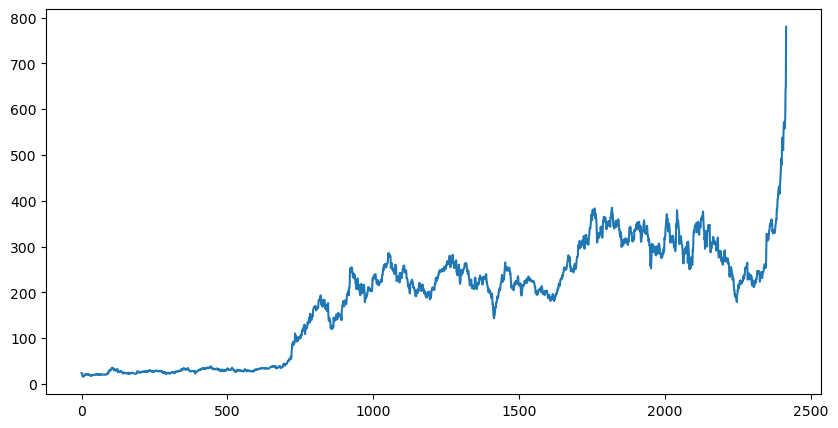

In [9]:
#plot  stock data by line Graph
plt.figure(figsize=(10,5))
data['Close'].plot()
plt.show()

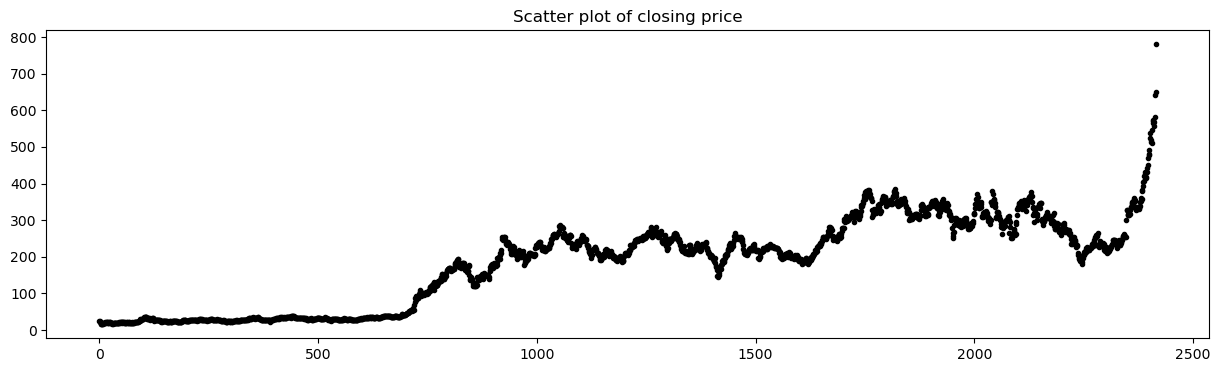

In [10]:
df_close=data['Close']
plt.figure(figsize=(15,4))
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


create new colume of price differnce

In [11]:
data['price_diff']=data['Close'].shift(-1)-data['Close']
data['price_diff']
     

0        -0.059999
1        -1.870001
2        -2.759998
3        -3.090000
4        -0.310001
           ...    
2411     14.089966
2412     59.820008
2413      9.760009
2414    129.429993
2415           NaN
Name: price_diff, Length: 2416, dtype: float64

create new colume for daily return

In [12]:
data['daily_rn']=data['price_diff']/data['Close']
data['daily_rn']

0      -0.002511
1      -0.078473
2      -0.125683
3      -0.160937
4      -0.019243
          ...   
2411    0.024854
2412    0.102962
2413    0.015231
2414    0.198949
2415         NaN
Name: daily_rn, Length: 2416, dtype: float64

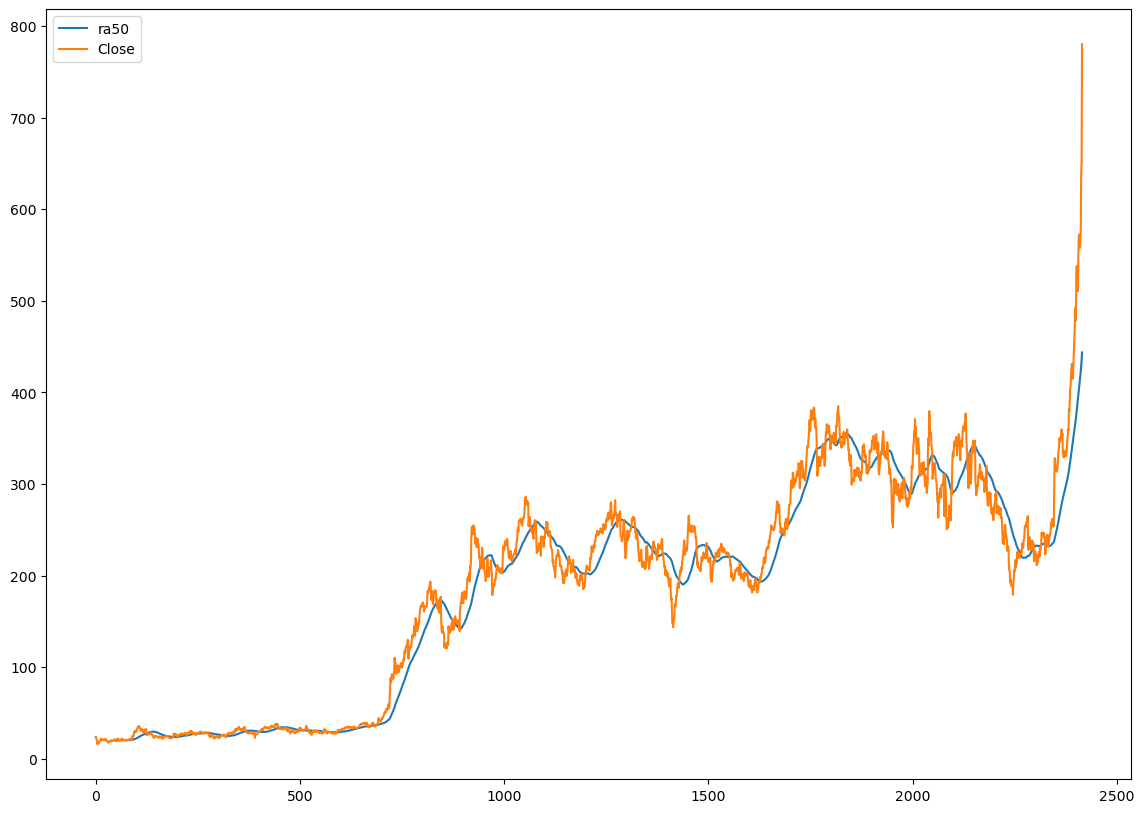

In [13]:
#here we apply rolling widow calculation for 50 days 
'''In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series
 of averages of different subsets of the full data set. It is also called a moving mean (MM). or rolling mean and is a type of 
finite impulse response filter. Variations include: simple, cumulative, or weighted forms (described below). Highly used for financial analyses.'''
data['ra50']=data['Close'].rolling(50).mean()
plt.figure(figsize=(14,10))
data['ra50'].plot()
data['Close'].plot()
plt.legend()
plt.show()
#here we have ten year chrt of tesla stock with simple moving average  the blue line is shorter 50 days moving average most trader will use the cross of short term moving average 
#to initial a moveing average to inital a long position and identify  the start of bullish trend 
     

In [14]:
data['ra50']=data['Close'].rolling(50).mean()
data['ra10']=data['Close'].rolling(10).mean()

In [15]:
data=data.dropna()

     

In [16]:
data['Shares'] = [1 if data.loc[ei, 'ra10']>data.loc[ei, 'ra50'] else 0 for ei in data.index]
     

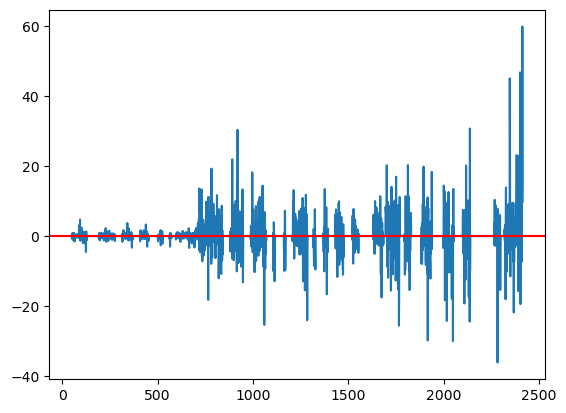

In [17]:
#calculate profit
data['Close1'] = data['Close'].shift(-1)
data['Profit'] = [data.loc[ei, 'Close1'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()
plt.axhline(y=0, color='red')

In [18]:
data['log_return']=np.log(data['Close'].shift(-1))-np.log(data['Close'])
data['log_return']
     

49     -0.009133
50     -0.026420
51      0.026903
52      0.019121
53      0.039912
          ...   
2410    0.015788
2411    0.024551
2412    0.097999
2413    0.015116
2414         NaN
Name: log_return, Length: 2366, dtype: float64

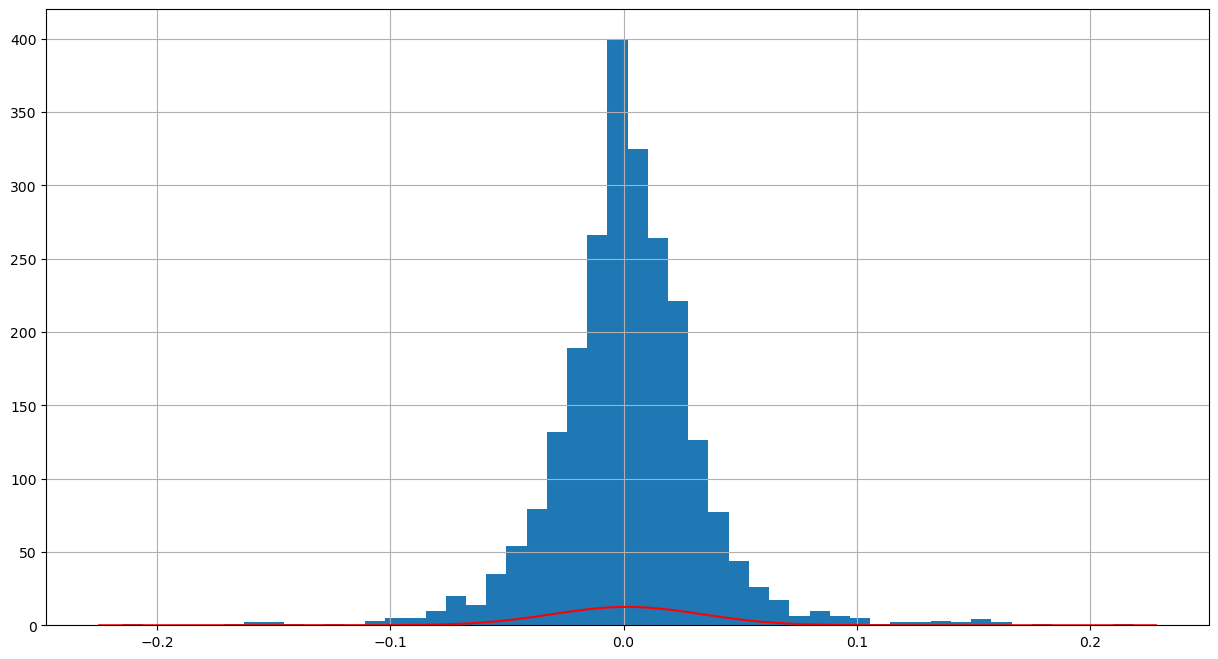

In [19]:
from scipy.stats import norm
mu = data['log_return'].mean()
sigma = data['log_return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(data['log_return'].min()-0.01, data['log_return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

data['log_return'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [20]:
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)
     



The probability of dropping over 10% in one day  0.0007272322154809123


In [21]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)

The probability of dropping over 25% over a year:  None


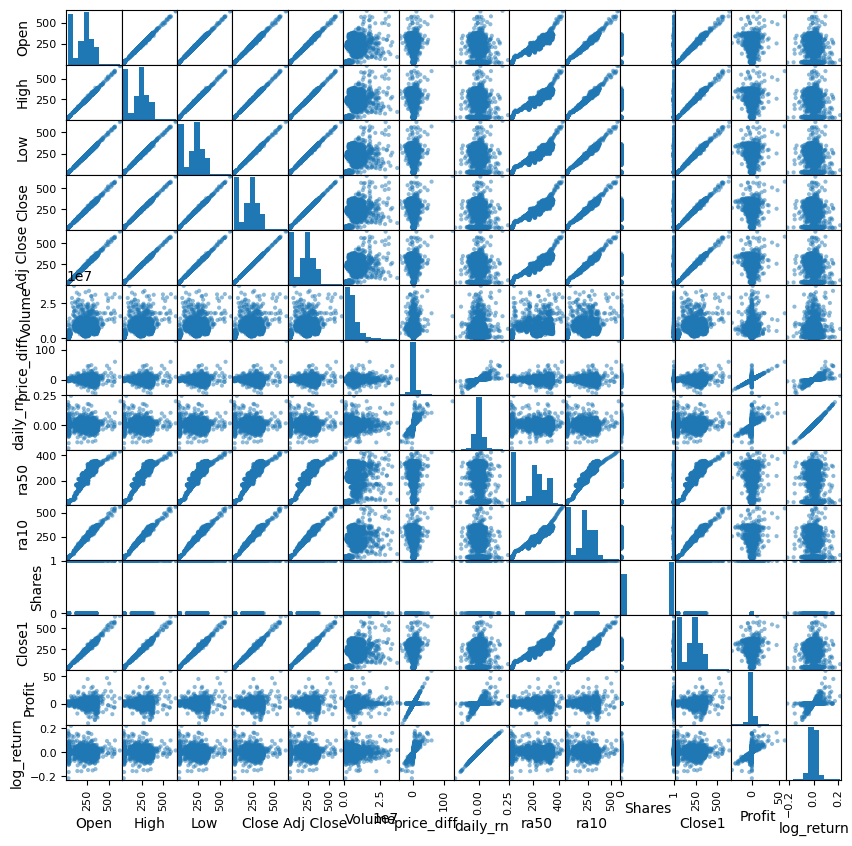

In [22]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, figsize=(10, 10))